C:\Users\Mauri\AppData\Local\Temp\ipykernel_18564\49125168.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='value', data=df_box, ax=axes[0],palette='deep').set(title='Year-wise Box Plot (Trend)')
C:\Users\Mauri\AppData\Local\Temp\ipykernel_18564\49125168.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='value', data=df_box,ax=axes[1],order=hue_order,palette='deep').set(title='Month-wise Box Plot (Seasonality)')


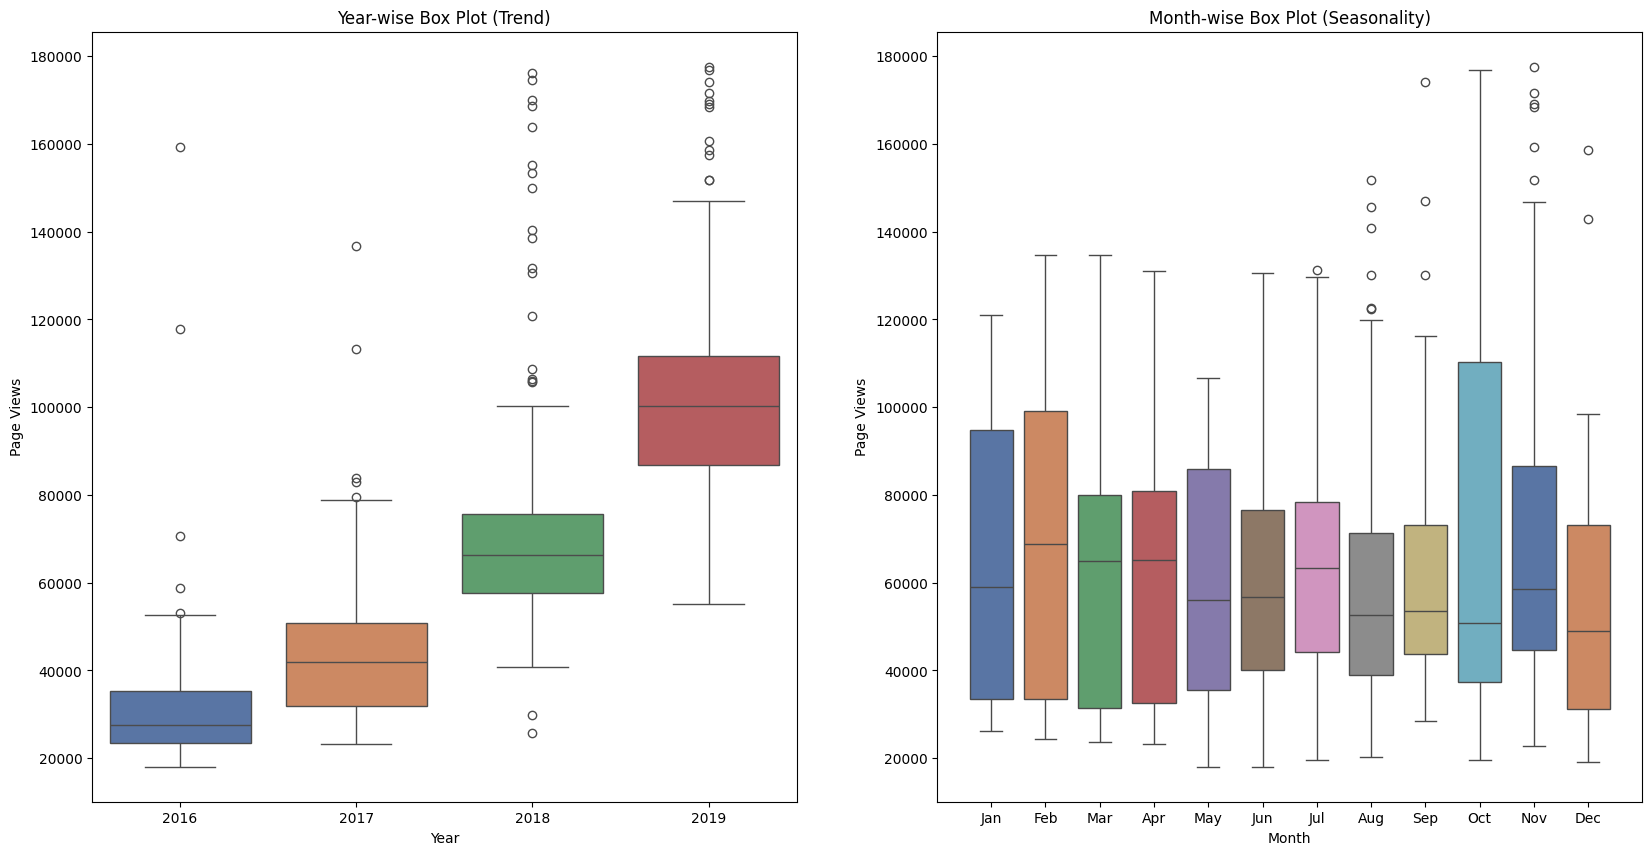

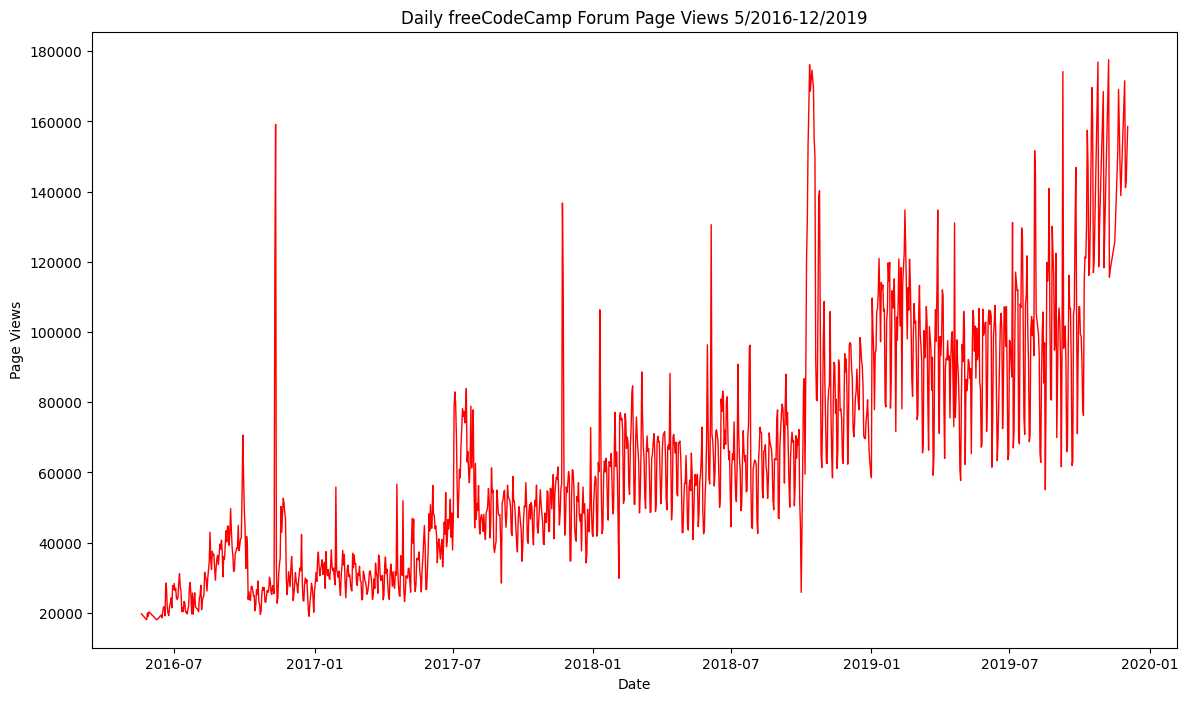

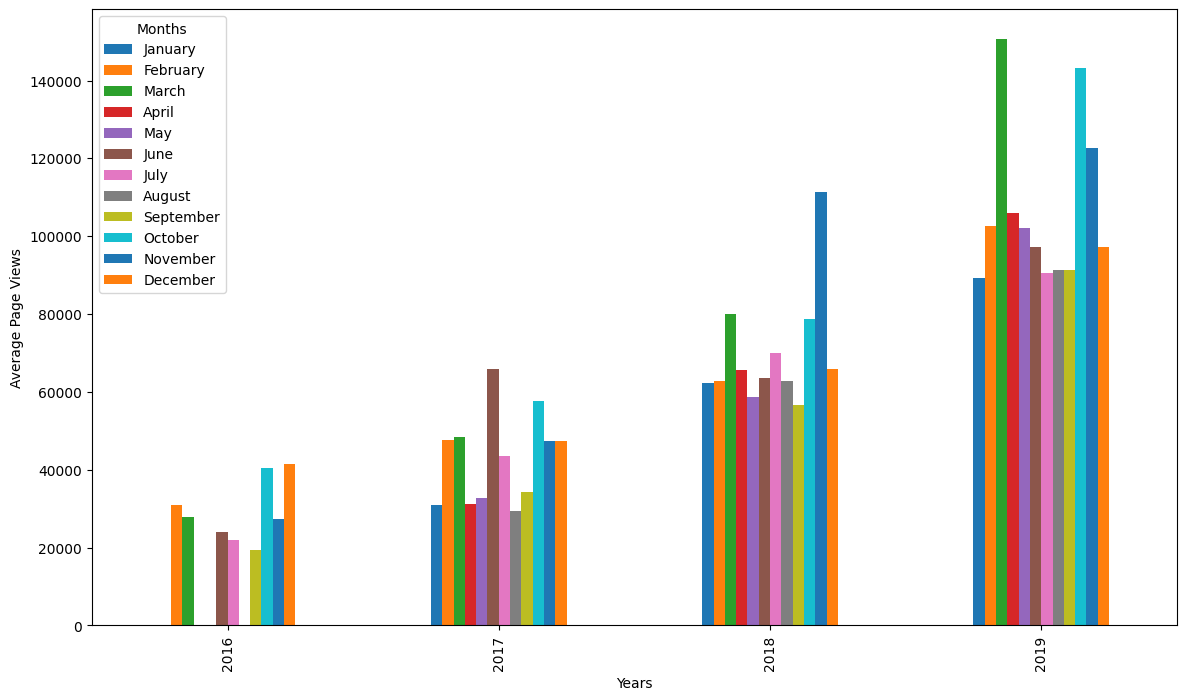

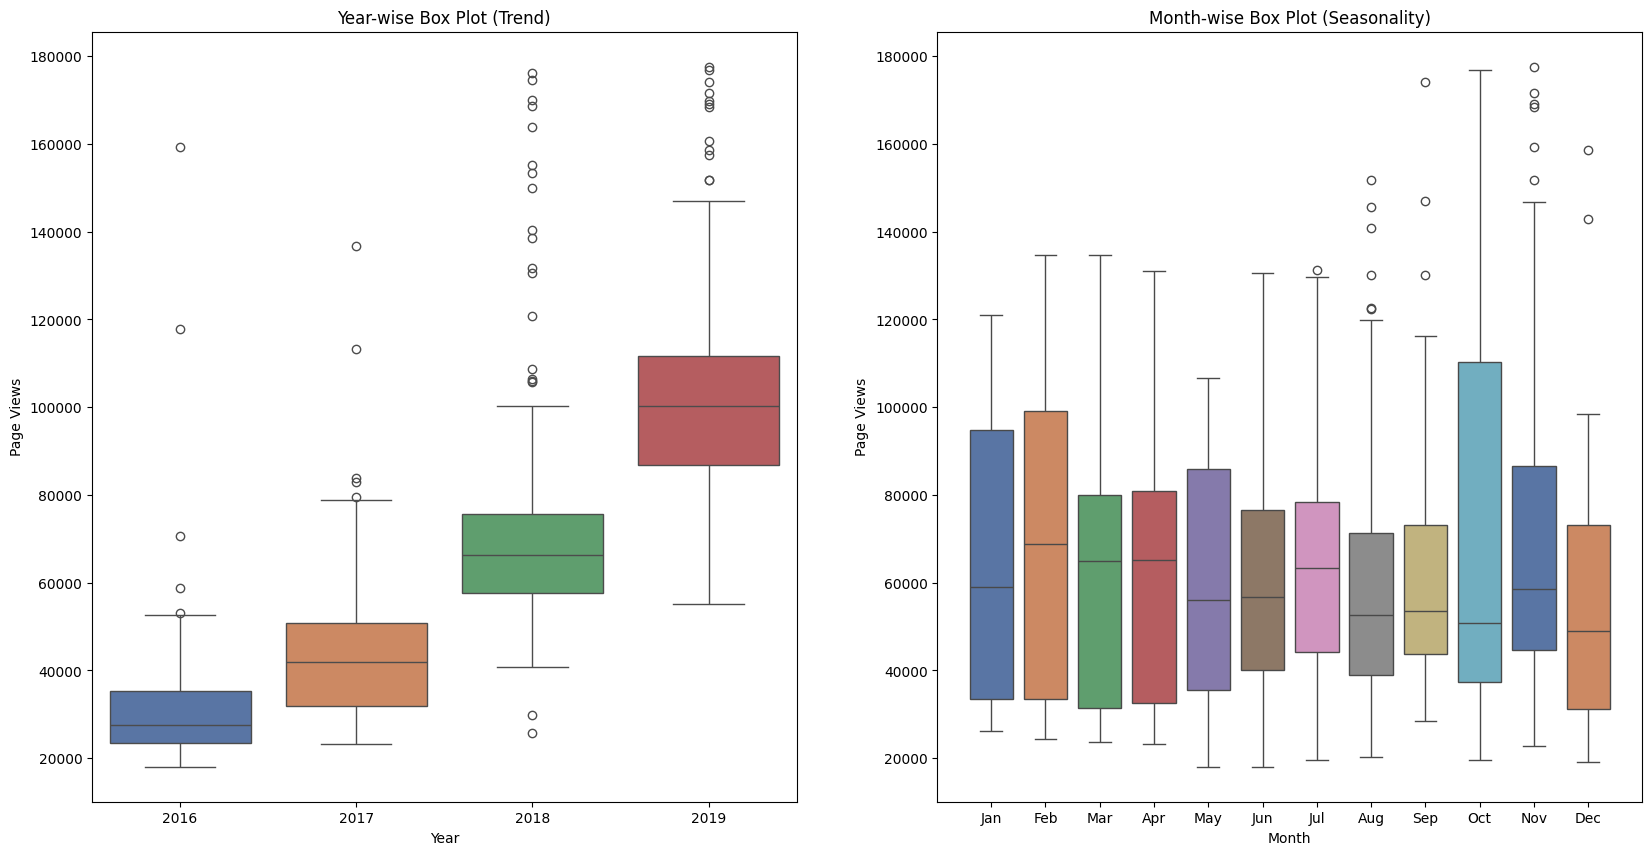

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

# Clean data
s = df['value'].quantile(0.975)
p = df['value'].quantile(0.025)

df = df[(df['value'] > p) & (df['value'] < s)]

# Draw line plot

def draw_line_plot():

    fig = plt.figure(figsize=(14,8))

    plt.plot(df.index, df['value'], color='red', linewidth=1)

    plt.xlabel('Date')
    plt.ylabel('Page Views')

    plt.ticklabel_format(axis='y', style='plain')

    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

draw_line_plot()

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar.reset_index(inplace=True)
    df_bar['year'] = [d.year for d in df_bar.date] 
    df_bar['month'] = [d.strftime('%b') for d in df_bar.date] 

    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Draw bar plot

    fig = df_bar.plot(kind='bar', figsize=(14,8)).figure
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months', labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])




    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

draw_bar_plot()

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    hue_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(20,10))
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0],palette='deep').set(title='Year-wise Box Plot (Trend)')
    sns.boxplot(x='month', y='value', data=df_box,ax=axes[1],order=hue_order,palette='deep').set(title='Month-wise Box Plot (Seasonality)')
    plt.autoscale(tight=False)

    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

draw_box_plot()
